# The Coding Challenge

## The Problem

As part of the Data Scientists Team you are assigned to a new project. In the first meeting with your new stakeholder you learn that she wants to sell more Term Deposits as they represent a good sources of income for the bank and she has a KPI to meet by the end of the year (on Term Deposits).<br />  
(A Term Deposit is a cash investment with a financial institution. The customer’s money are invested for pre-agreed rate of interest over a fixed amount of time thus encouraging the customer to keep the money with the bank. The bank has various options of using this money to generate more profit: e.g. lend it.)<br />  
You also learn that currently there is in place a set of business rules that are used to generate leads (i.e. customers that should be contacted and proposed a Term Deposit) but the branch colleagues are reluctant to act based on these leads. They lack the explanation of why a certain customer should be contacted and thus the treatment rate is very low (a very small % of the leads are treated) and the feedback for these leads is mostly negative (most of the time they flag the lead as not relevant). Also there is no documentation for these business rules and the colleague that deployed them no longer works in the bank.

## The Data

You discussed with you fellow DS colleagues and learned that last year there was an outbound marketing campaign (calls) to sell term deposits and it might be useful for your exercise.  
You get your hands on the table holding this info and discover that you have access to the following information:

| Variable | Description | Data Type | Example values |
| -------- | :---------- | --------- | :------------- |
| **General features:** |
| age | The age of the customer in years | numeric | 24, 29, 80, etc. |
| job | The type of job the customer has | categorical | admin., unknown, unemployed, management, housemaid, entrepreneur, student, blue-collar, self-employed, retired, technician, services |
| marital | The marital status | categorical | married, divorced, single (divorced means divorced or widowed) |
| education | Education level | categorical | unknown, secondary, primary, tertiary |
| default | Has credit in default? | binary | yes, no |
| balance | Average yearly balance expressed in euros | numeric | 29, 2, 2143, etc. |
| housing | Has housing loan? | binary | yes, no |
| loan | Has personal loan? | binary | yes, no |
| **Related to the last contact of the current campaign:** |
| contact | Contact communication type | categorical | unknown, telephone, cellular |
| day | Last contact day of the month | numeric | 5, 6, 20, etc. |
| month | Last contact month of year | categorical | jan, feb, mar, …, nov, dec |
| duration | Last contact duration, in seconds | numeric | 261, 151, etc. |
| **Other attributes:** |
| campaign | Number of contacts performed during this campaign and for this client, including last contact | numeric | 1, 2, etc. |
| pdays | Number of days that passed by after the client was last contacted from a previous campaign | numeric | 1, 2, etc. (-1 means client was not previously contacted) |
| previous | Number of contacts performed before this campaign and for this client | numeric | 1, 2, etc. |
| poutcome | Outcome of the previous marketing campaign | categorical | unknown, other, failure, success |
| **Output variable (desired target):** |
| y | Has the client subscribed to a term deposit? | binary | yes, no |

## The Requirements

<ol>
    <li>Have a functional model that produces output.</li>
    <li>Prepare a presentation for your stakeholders that sells your work. Do bear in mind that your stakeholders are not technical people and have hard time accepting results they cannot understand.</li>
</ol>

## The Extra Mile

<ol>
    <li>Draft an analytical roadmap for this project. Think of other potential uses of the output of this model and potential next steps.</li>
    <li>Think of a way to best present the business impact of the project. </li>
</ol>

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Check the Train data

In [2]:
train_set = pd.read_csv('./train.csv', sep=';')

In [3]:
train_set.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
train_set.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
train_set['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

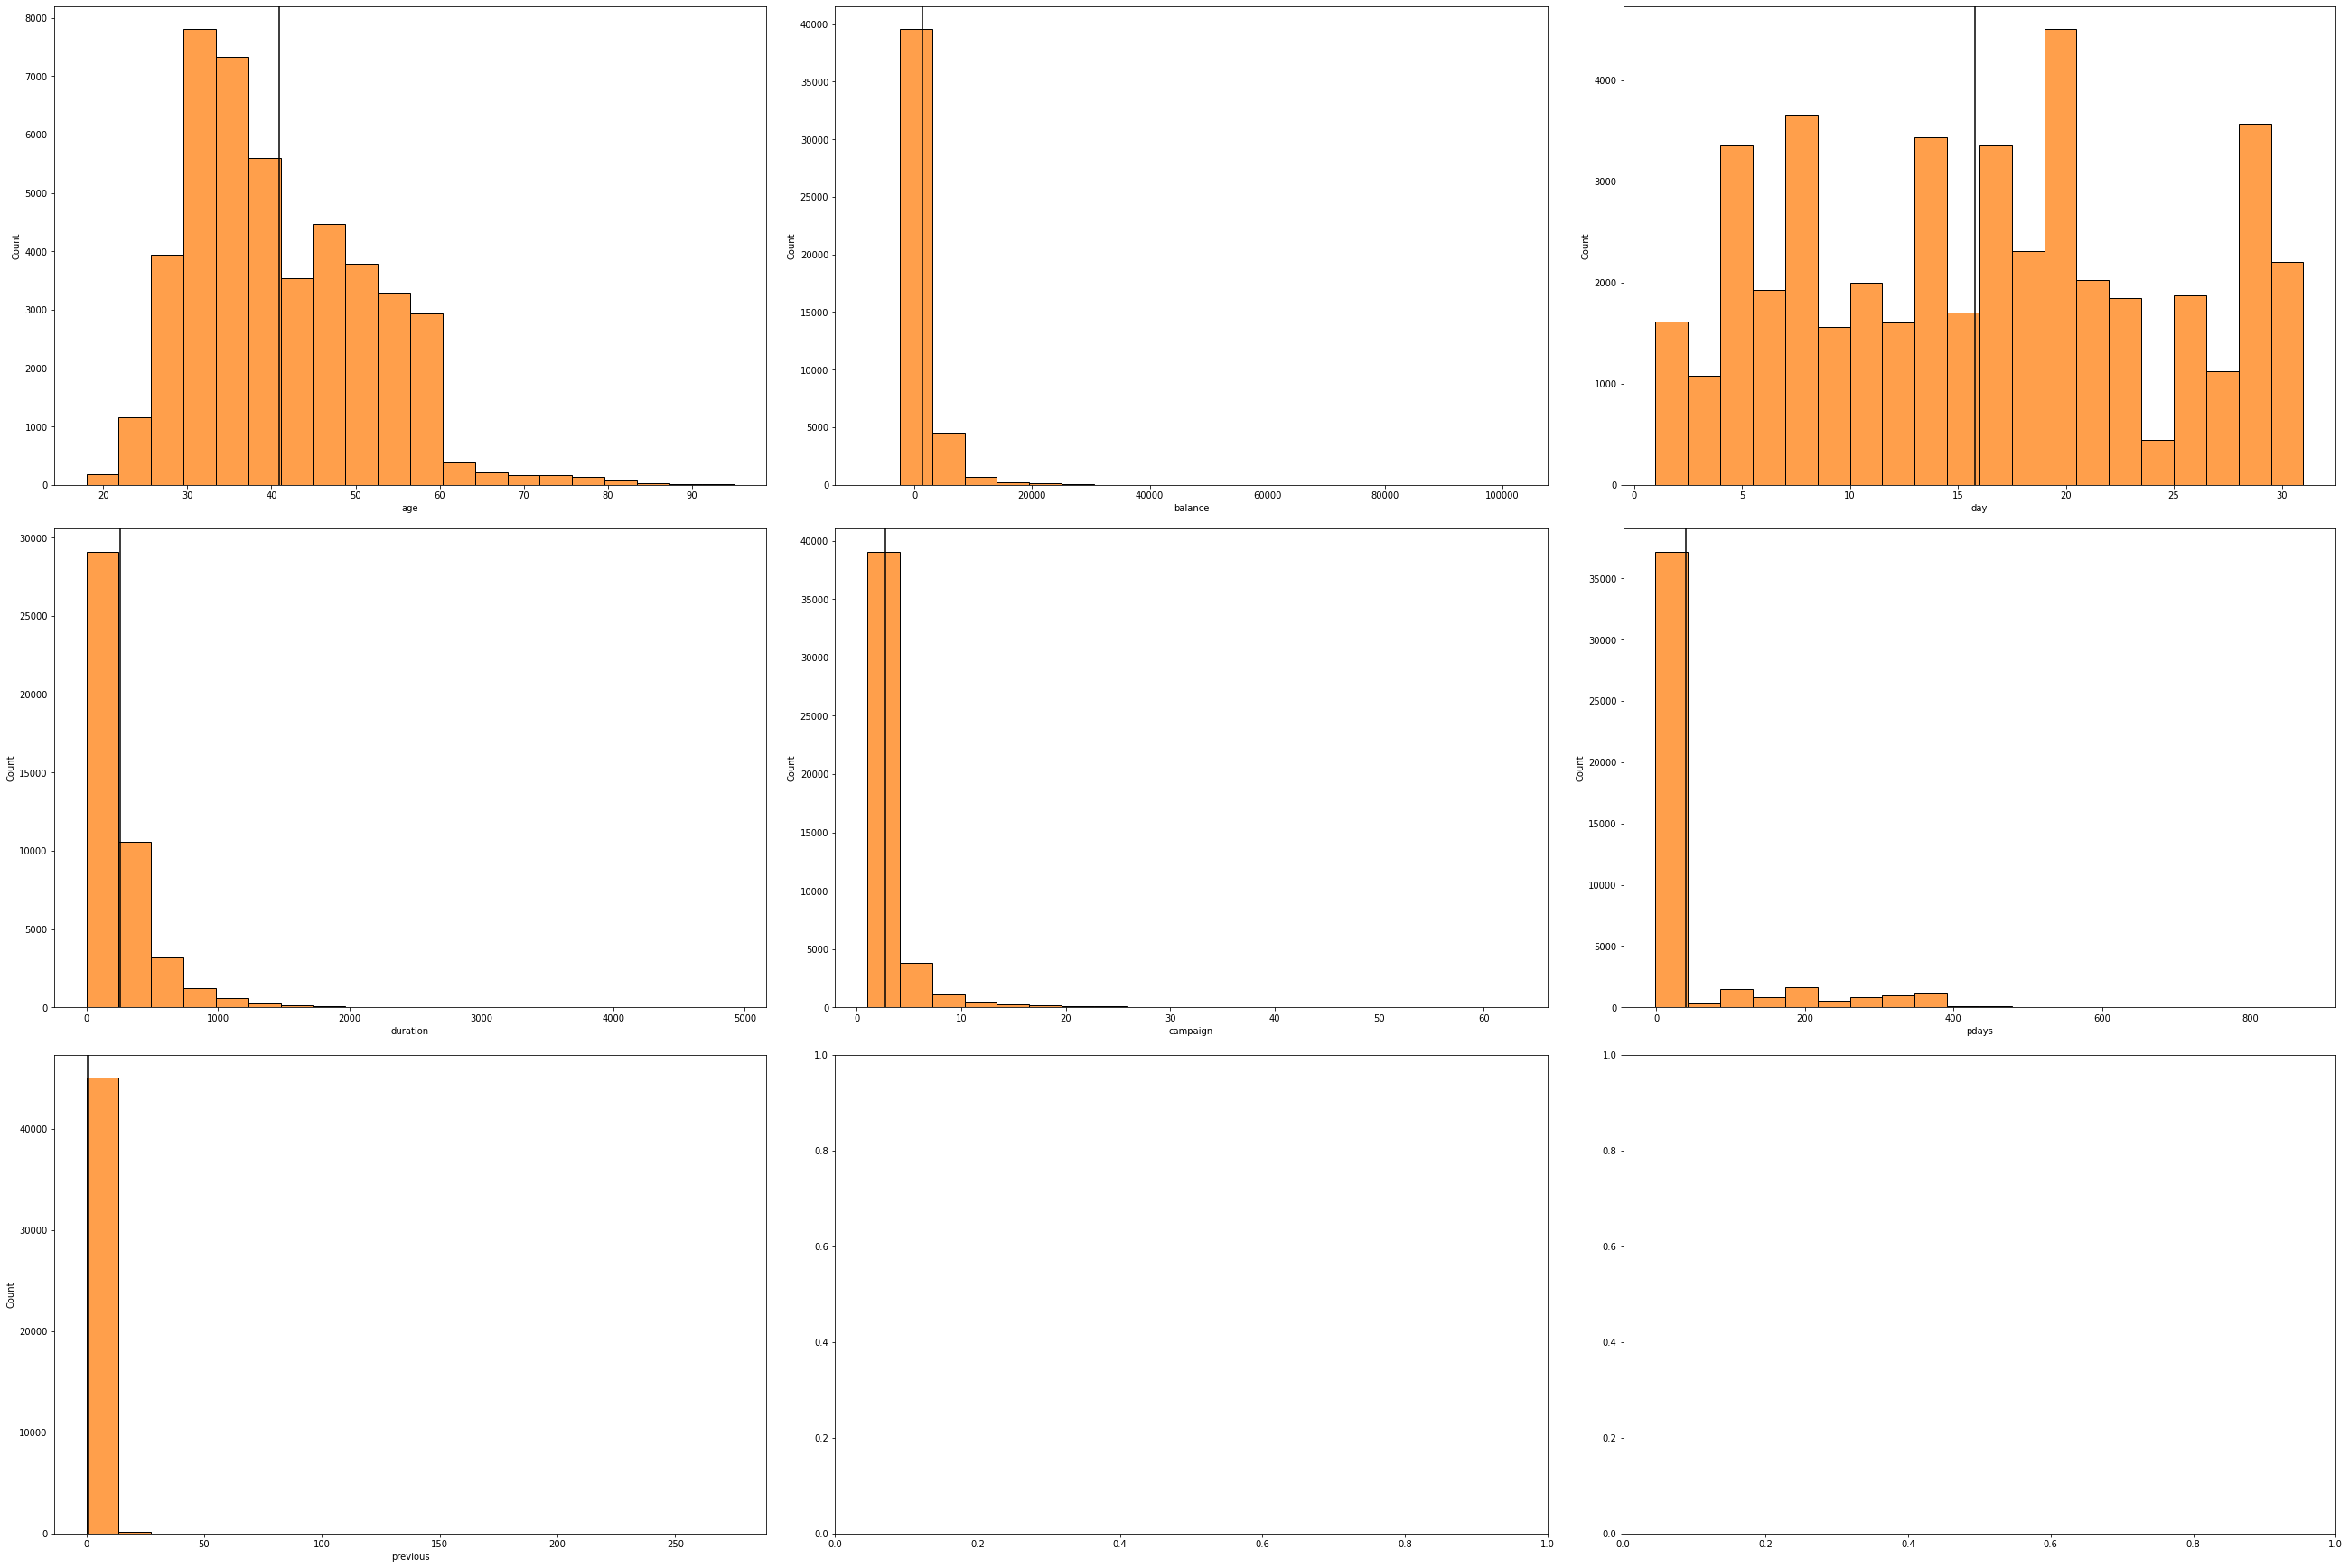

In [7]:
num = train_set.select_dtypes(include=np.number)  # Get numeric columns
n = num.shape[1]  # Number of cols

total_cols = 3
total_rows = n//total_cols + 1

fig, axes = plt.subplots(total_rows, total_cols, figsize=(12*total_cols, 8*total_rows), constrained_layout=True)  # Create subplots

for i, var in enumerate(num):
    row = i//total_cols
    pos = i % total_cols
    ax = axes[row][pos]
    sns.histplot(num[var], ax=ax, bins=20, color='C1')   # Plot histograrm
    ax.axvline(num[var].mean(), c='k')  # Plot mean line

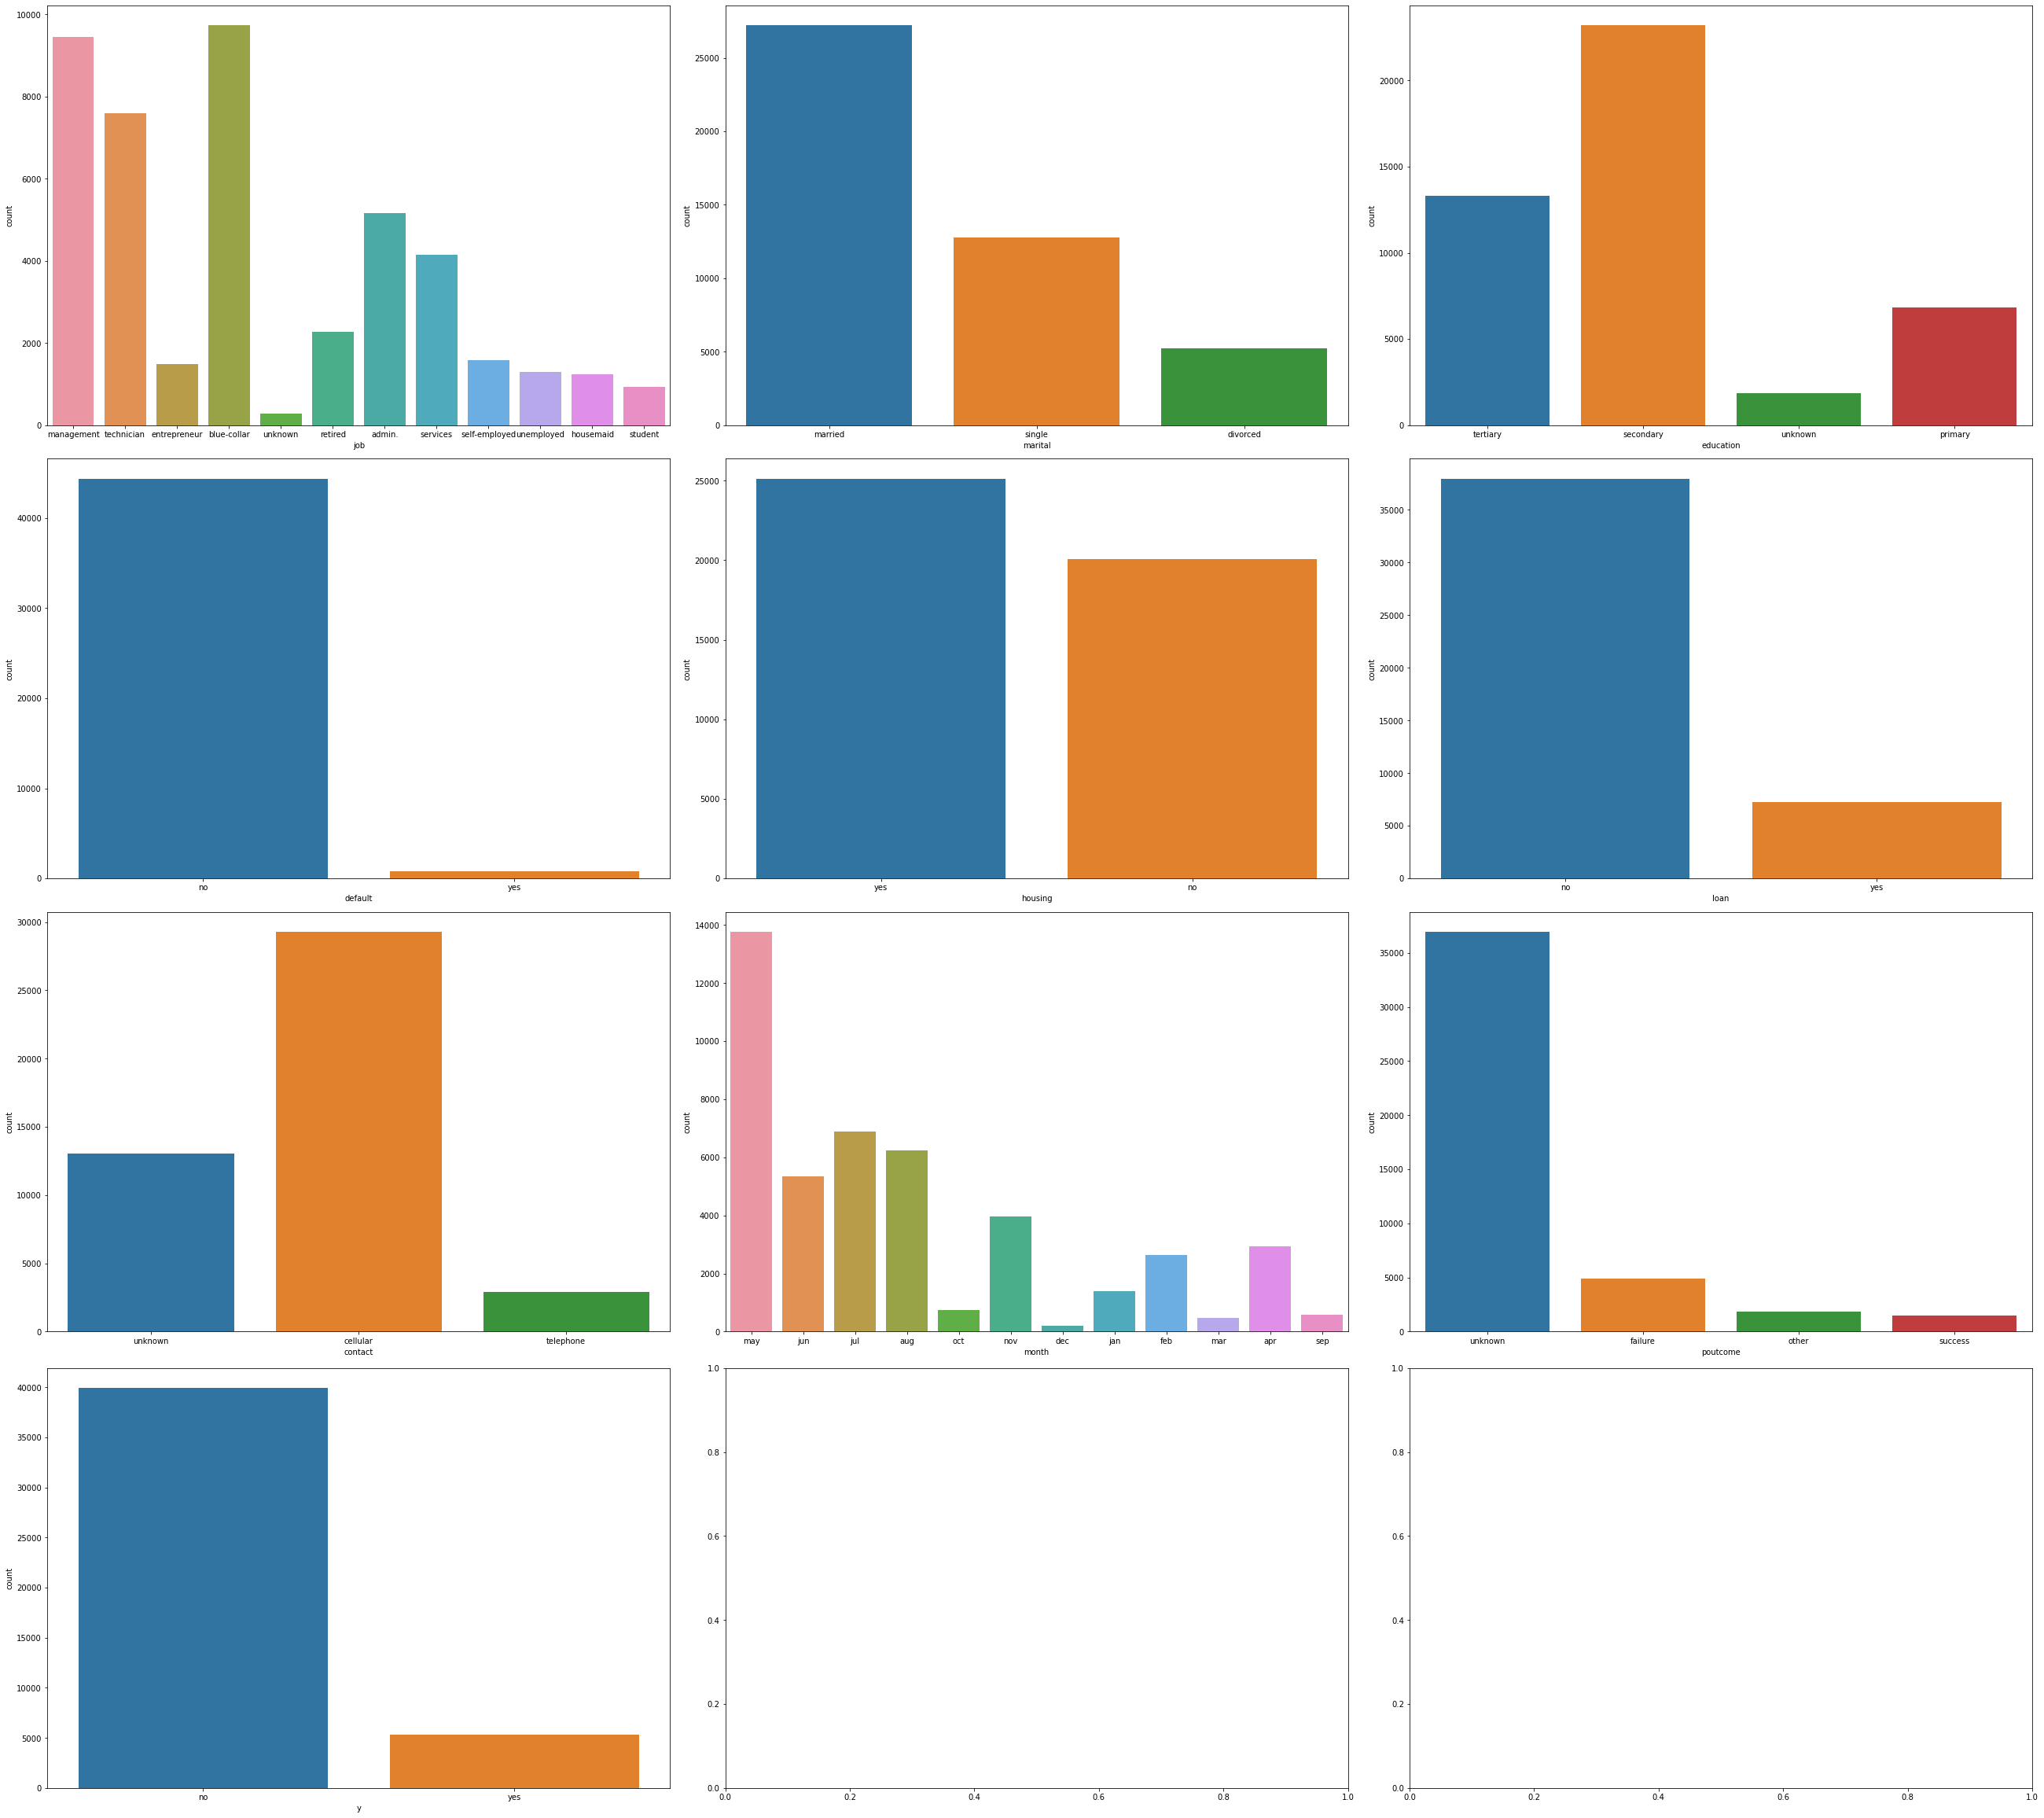

In [ ]:
cat = train_set.select_dtypes(include=object)  # Get n
o = cat.shape[1]  # Number of cols

total_cols = 3
total_rows = o//total_cols + 1

fig, axes = plt.subplots(total_rows, total_cols, figsize=(12*total_cols, 8*total_rows), constrained_layout=True)  # Create subplots

for i, var in enumerate(cat):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=cat[var], ax=axes[row][pos])

# Check the Test data

In [8]:
test_set = pd.read_csv('./test.csv', sep=';')

In [9]:
test_set.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [10]:
test_set.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [11]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [12]:
test_set['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

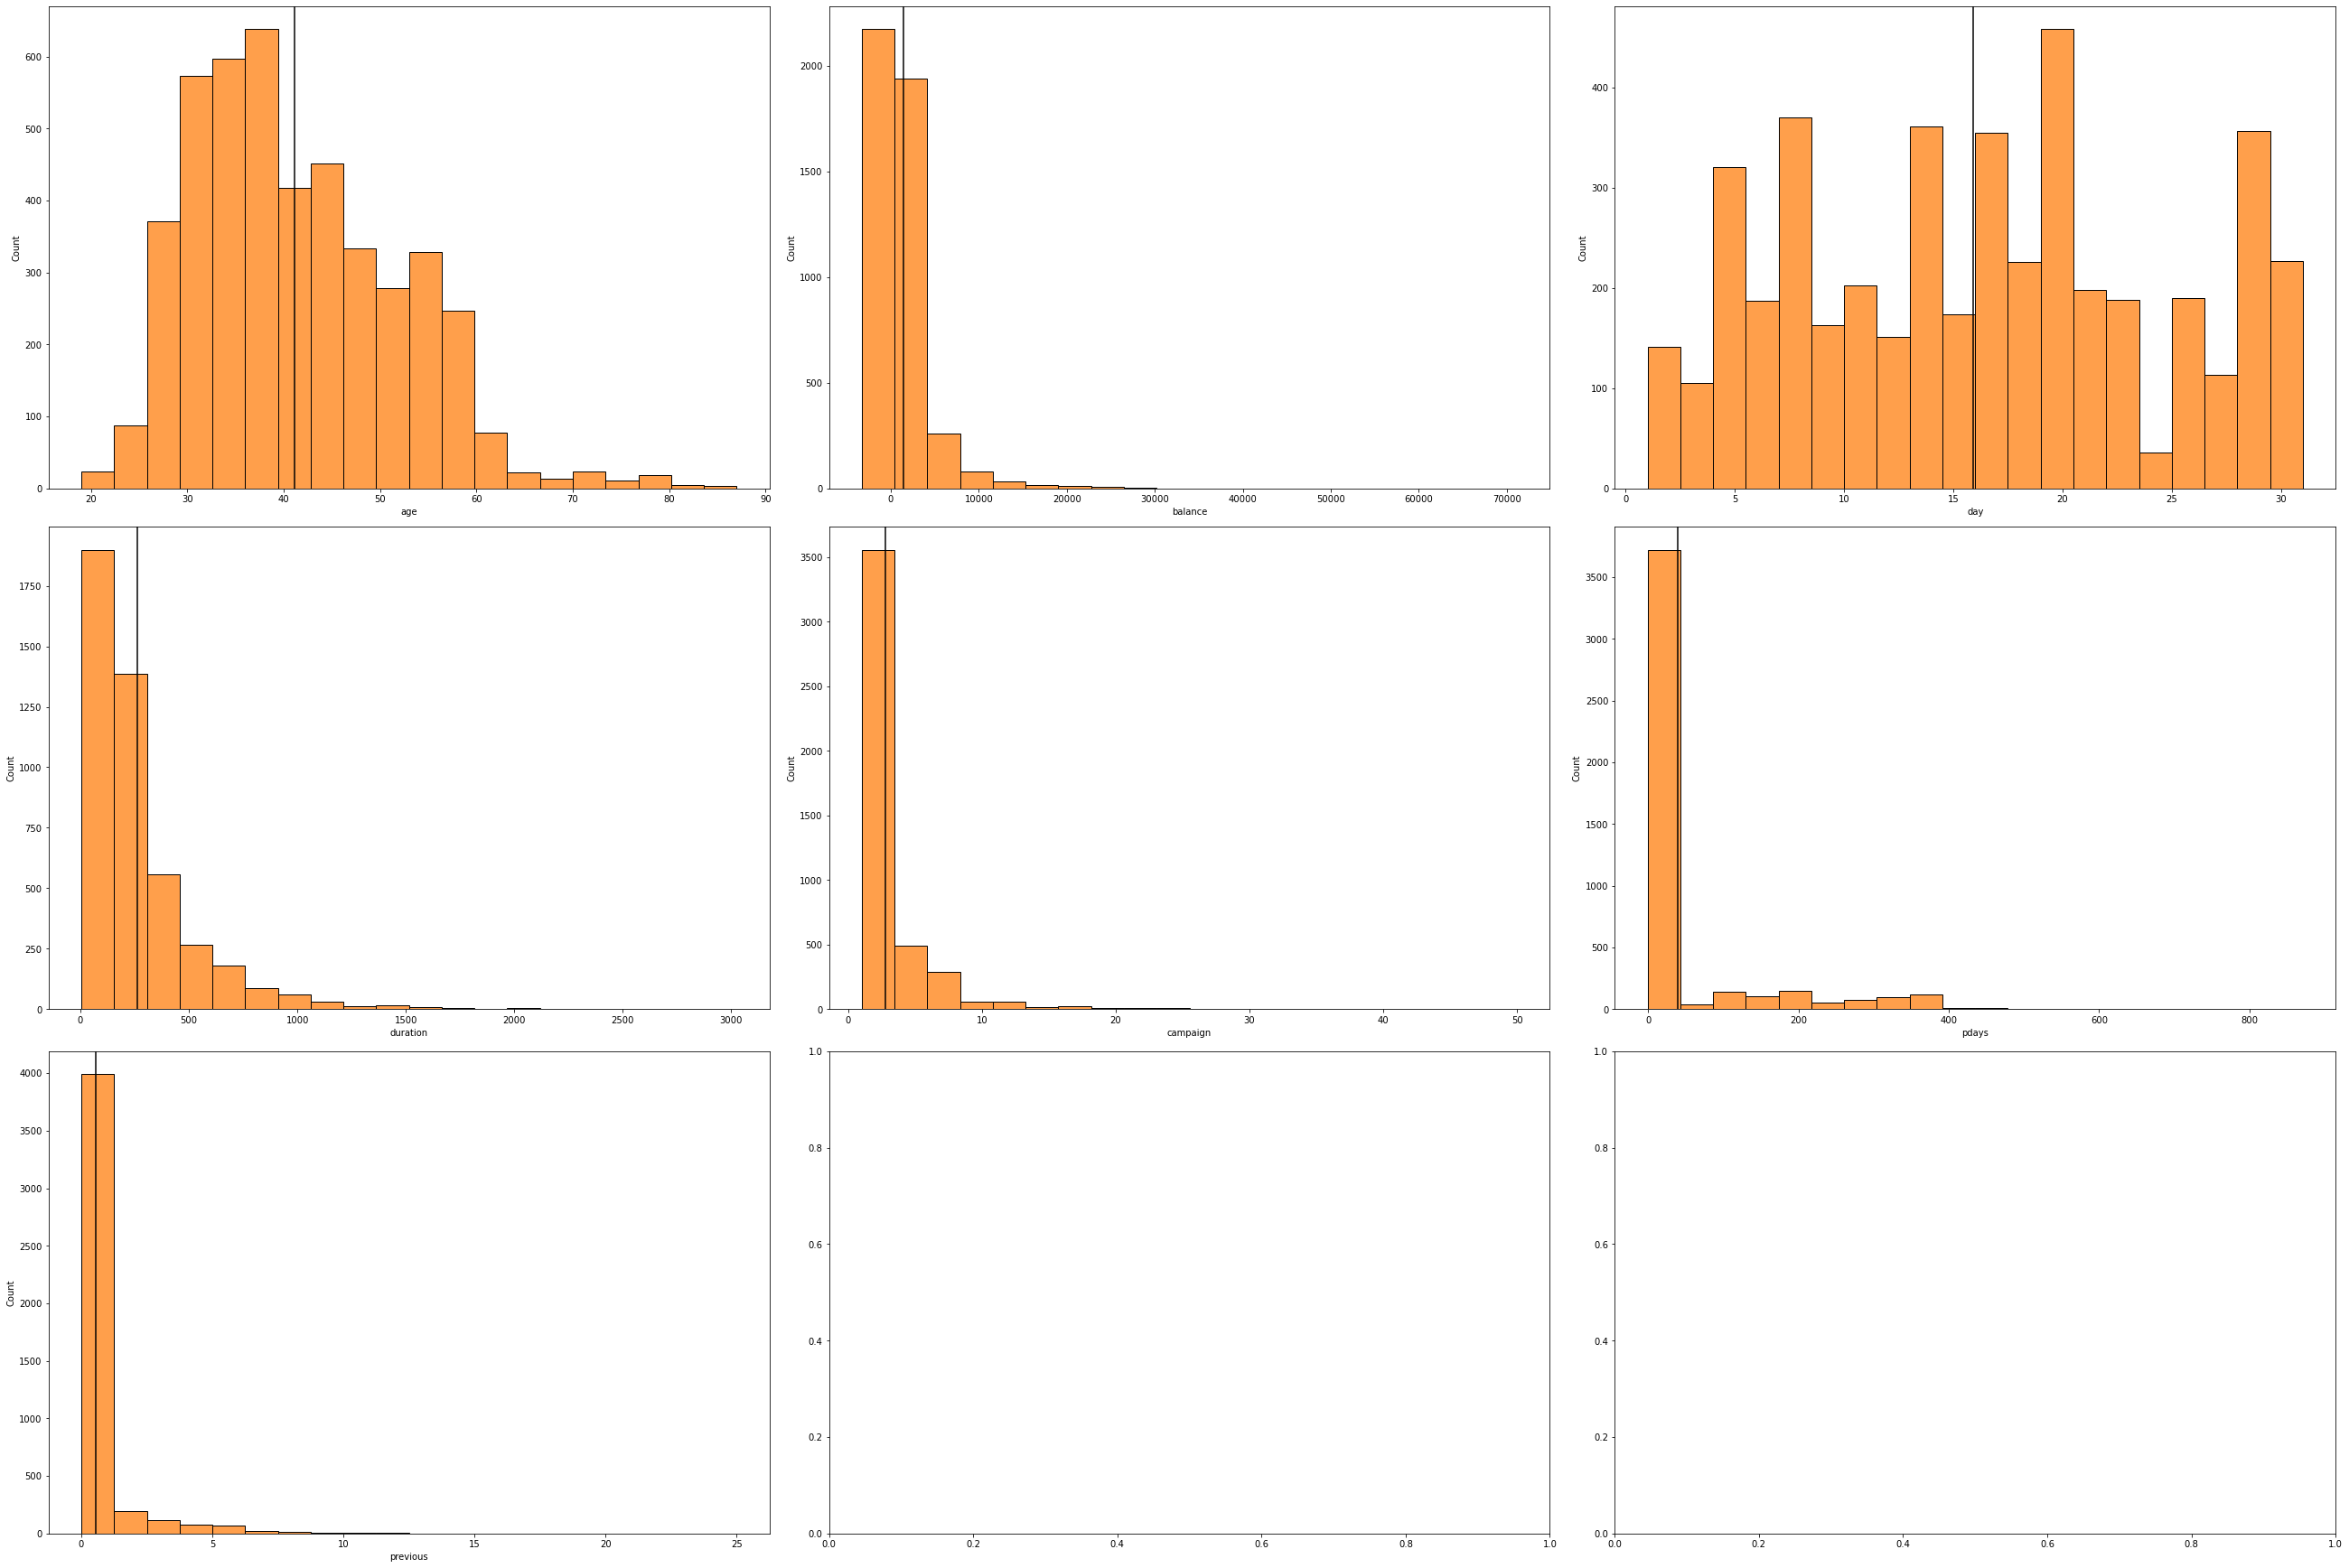

In [ ]:
num = test_set.select_dtypes(include=np.number)  # Get numeric columns
n = num.shape[1]  # Number of cols

total_cols = 3
total_rows = n//total_cols + 1

fig, axes = plt.subplots(total_rows, total_cols, figsize=(12*total_cols, 8*total_rows), constrained_layout=True)  # Create subplots

for i, var in enumerate(num):
    row = i//total_cols
    pos = i % total_cols
    ax = axes[row][pos]
    sns.histplot(num[var], ax=ax, bins=20, color='C1')   # Plot histograrm
    ax.axvline(num[var].mean(), c='k')  # Plot mean line

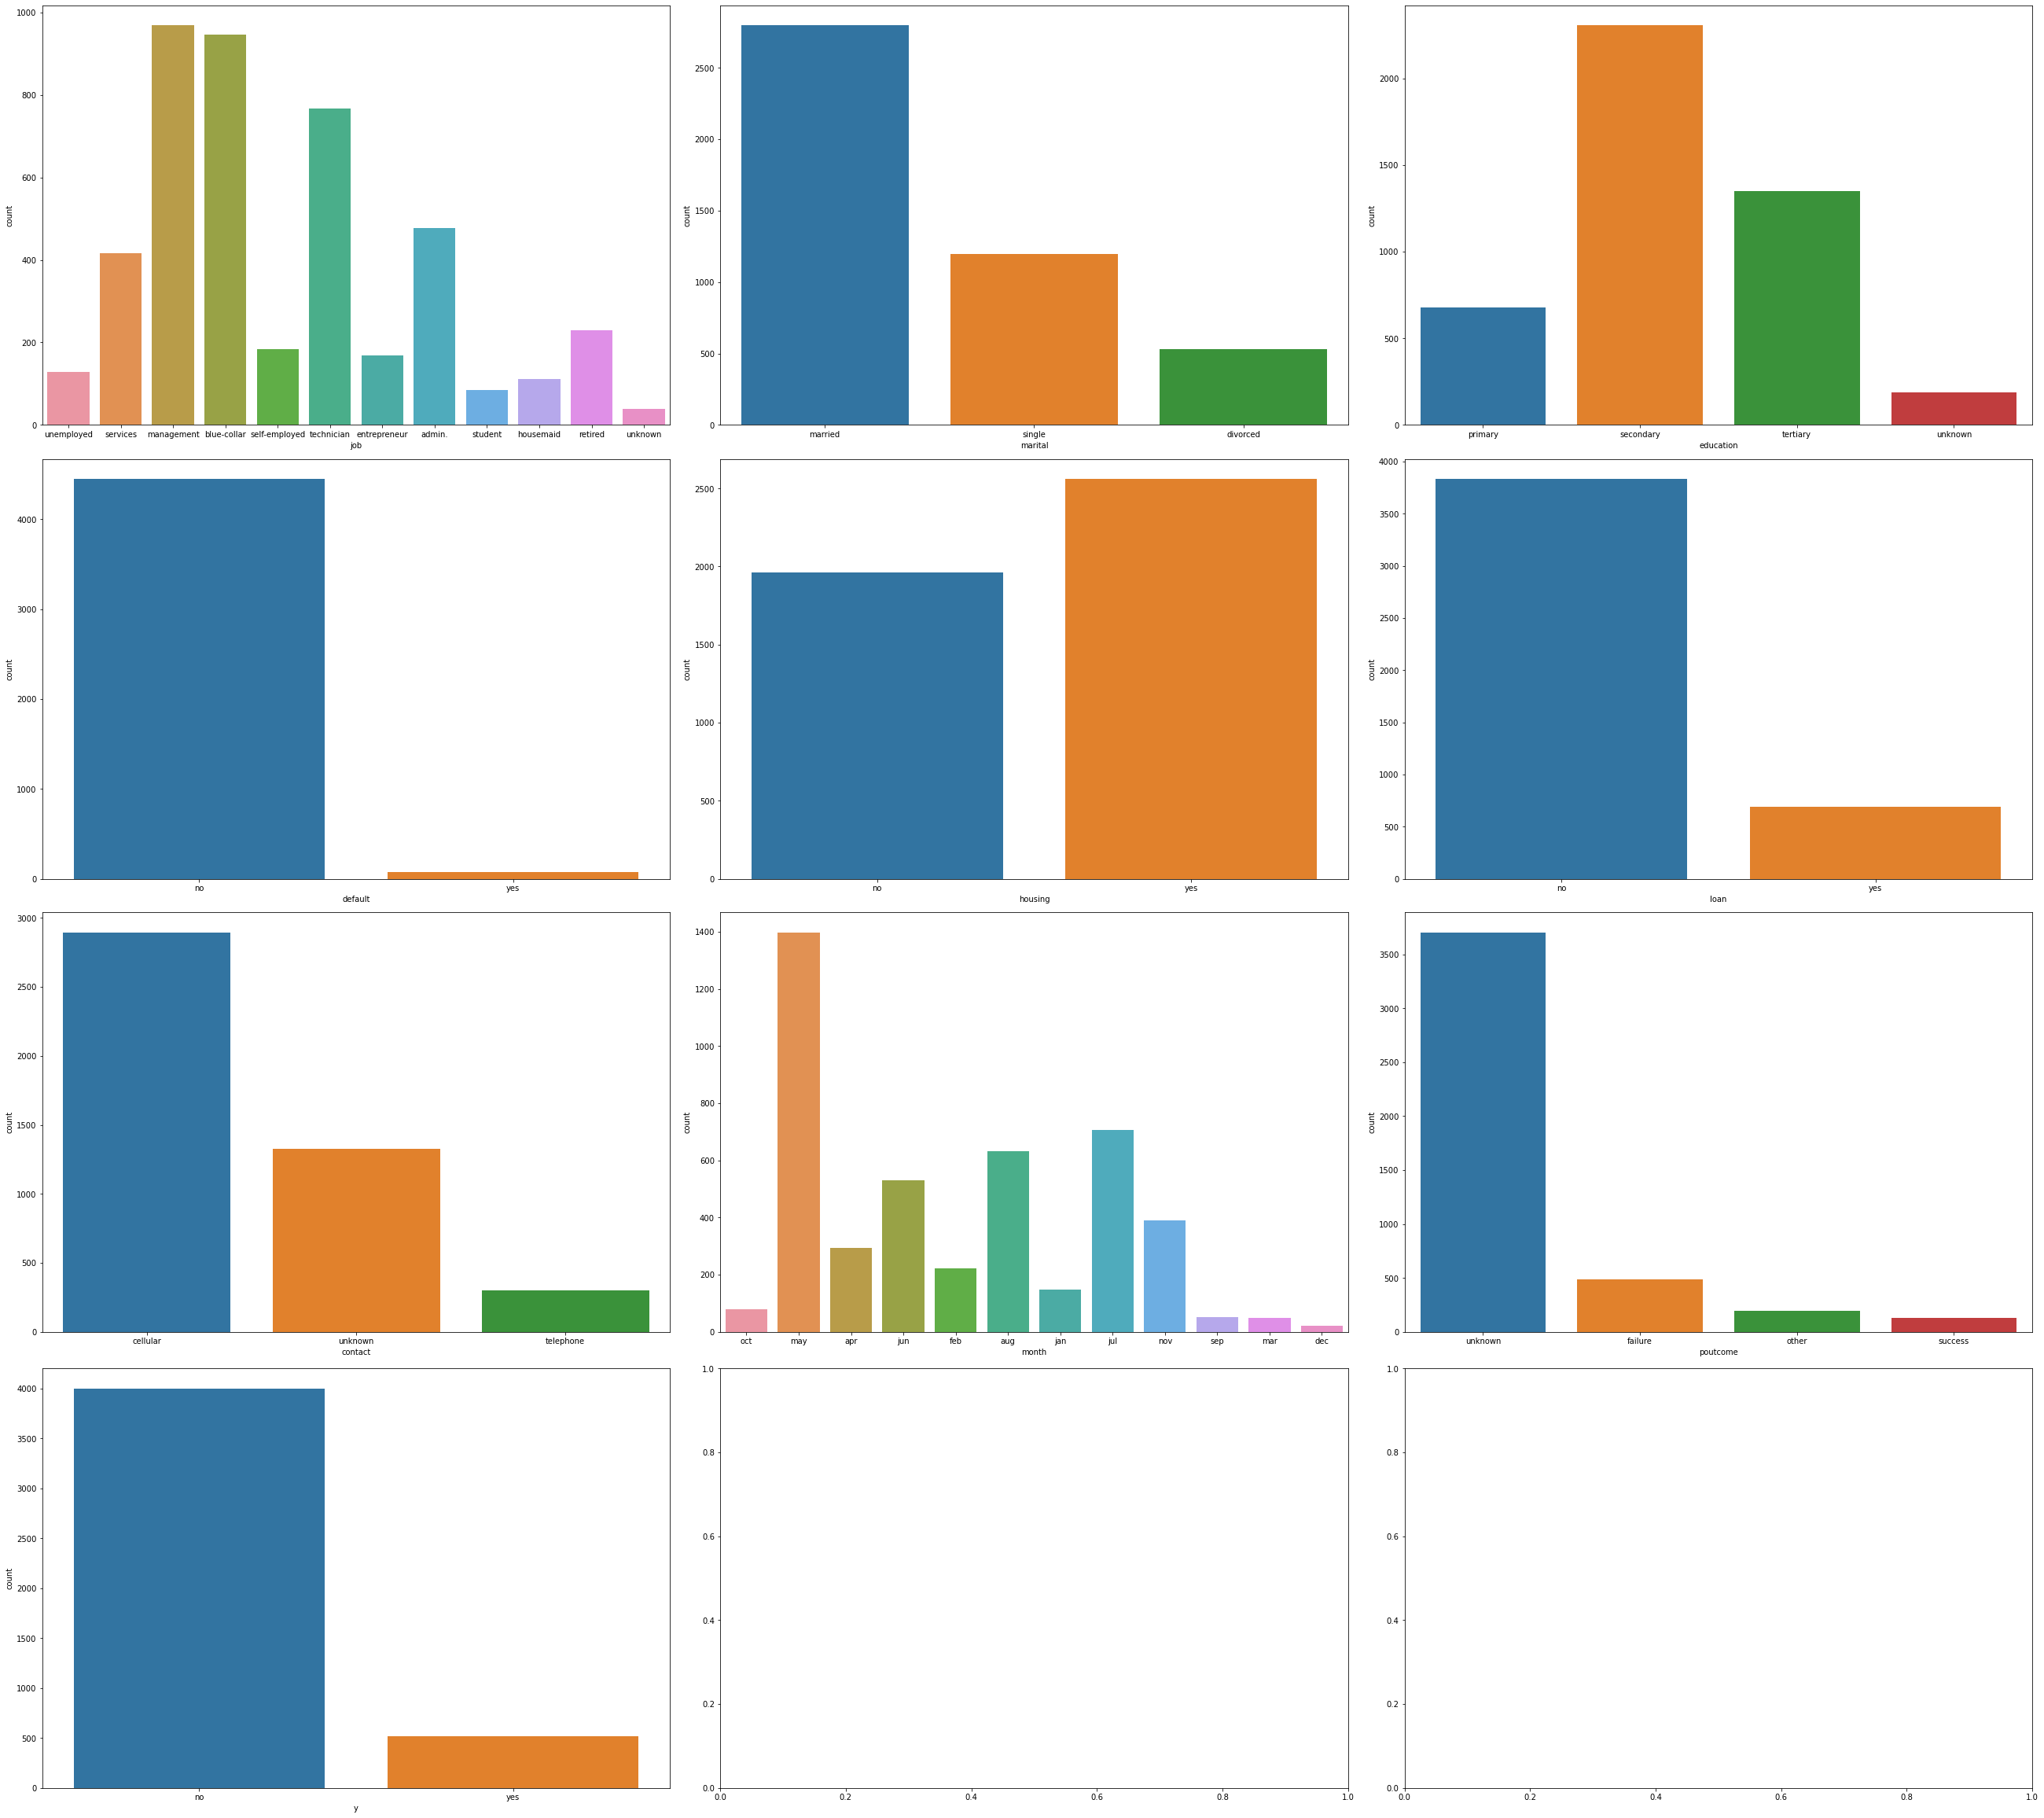

In [ ]:
cat = test_set.select_dtypes(include=object)  # Get n
o = cat.shape[1]  # Number of cols

total_cols = 3
total_rows = o//total_cols + 1

fig, axes = plt.subplots(total_rows, total_cols, figsize=(12*total_cols, 8*total_rows), constrained_layout=True)  # Create subplots

for i, var in enumerate(cat):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=cat[var], ax=axes[row][pos])

#Project

In [75]:
df= pd.read_csv('./train.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


check last 5 raw of the dataset

In [76]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [77]:
df.shape

(45211, 17)

In [78]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

dropping irrelevent features

In [79]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [80]:
#Drop column "contact" which is useless
df = df.drop('contact', axis=1)

In [81]:
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Describe the pdays column, make note of the mean, median and minimum values.

In [82]:
print(df.pdays.describe())

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


In [83]:
print(df.pdays.value_counts().head(1))

-1    36954
Name: pdays, dtype: int64


In [84]:
df.shape

(45211, 16)

Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [85]:
df_up = df[df.pdays != -1]

In [86]:
df_up.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

Here we have not considering -1 values in pdays column and limiting ourselves , and then now we can observe the difference between mean and median values in before and now.
There is a huge difference from the previous values :
Previously Mean was of 40 and median = -1 , now after limiting -1 values we have mean=224 and median=194

In [87]:
# Delete the rows which column 'poutcome' contains 'other'
condition = df.poutcome == 'other'
df = df.drop(df[condition].index, axis = 0, inplace = False)

df[['job','education']] = df[['job','education']].replace(['unknown'],'other')

In [88]:
#  Drop customer values with 'other' education
condition3 = (df['education'] == 'other')
df = df.drop(df[condition3].index, axis = 0, inplace = False)

Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

In [89]:
bardf=df.groupby(['education'])['balance'].median()
bardf

education
primary      398.0
secondary    387.0
tertiary     572.0
Name: balance, dtype: float64

In [90]:
print(bardf.idxmax(),' has highest median value with {}'.format(bardf.max()))

tertiary  has highest median value with 572.0


Text(0.5, 1.0, 'Grouping Education based on balance')

<Figure size 720x288 with 0 Axes>

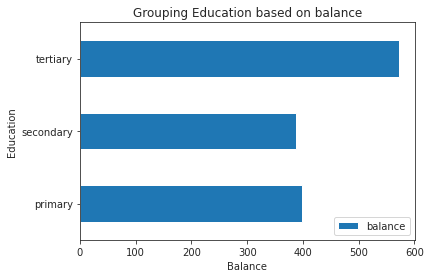

In [91]:
from matplotlib import *
import seaborn as sns
plt.figure(figsize=(10,4))
bardf=pd.DataFrame(bardf)
bardf.plot.barh()
plt.ylabel('Education')
plt.xlabel('Balance')
plt.title('Grouping Education based on balance')

Make a box plot for pdays. Do you see any outliers?

Text(0.5, 1.0, 'Without filtering')


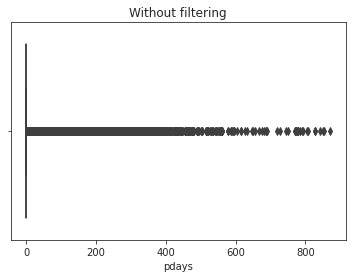

In [92]:
print(sns.boxplot(x=df['pdays']).set_title('Without filtering'))

Text(0.5, 1.0, 'With filtering pdays column')


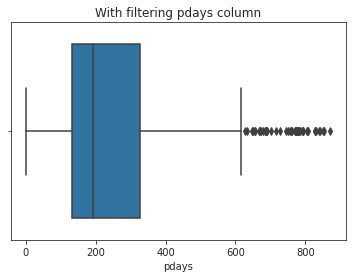

In [93]:
print(sns.boxplot(x=df_up['pdays']).set_title('With filtering pdays column'))

We have outliers which are greater thn 600in pdayss column after filtering also.

#EXPLORATORY DATA ANALYSIS

In [94]:
import warnings
warnings.filterwarnings('ignore')

In [95]:
num_var=list(df.select_dtypes(exclude='object').columns)
df[num_var]

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
5,35,231,5,139,1,-1,0
6,28,447,5,217,1,-1,0
...,...,...,...,...,...,...,...
45205,25,505,17,386,2,-1,0
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3


In [96]:
cat_var=list(df.select_dtypes(exclude=[np.number]).columns)
df[cat_var]

,job,marital,education,default,housing,loan,month,poutcome,y
0,management,married,tertiary,no,yes,no,may,unknown,no
1,technician,single,secondary,no,yes,no,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,may,unknown,no
5,management,married,tertiary,no,yes,no,may,unknown,no
6,management,single,tertiary,no,yes,yes,may,unknown,no
...,...,...,...,...,...,...,...,...,...
45205,technician,single,secondary,no,no,yes,nov,unknown,yes
45206,technician,married,tertiary,no,no,no,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,nov,unknown,yes
45208,retired,married,secondary,no,no,no,nov,success,yes


bi variate analysis

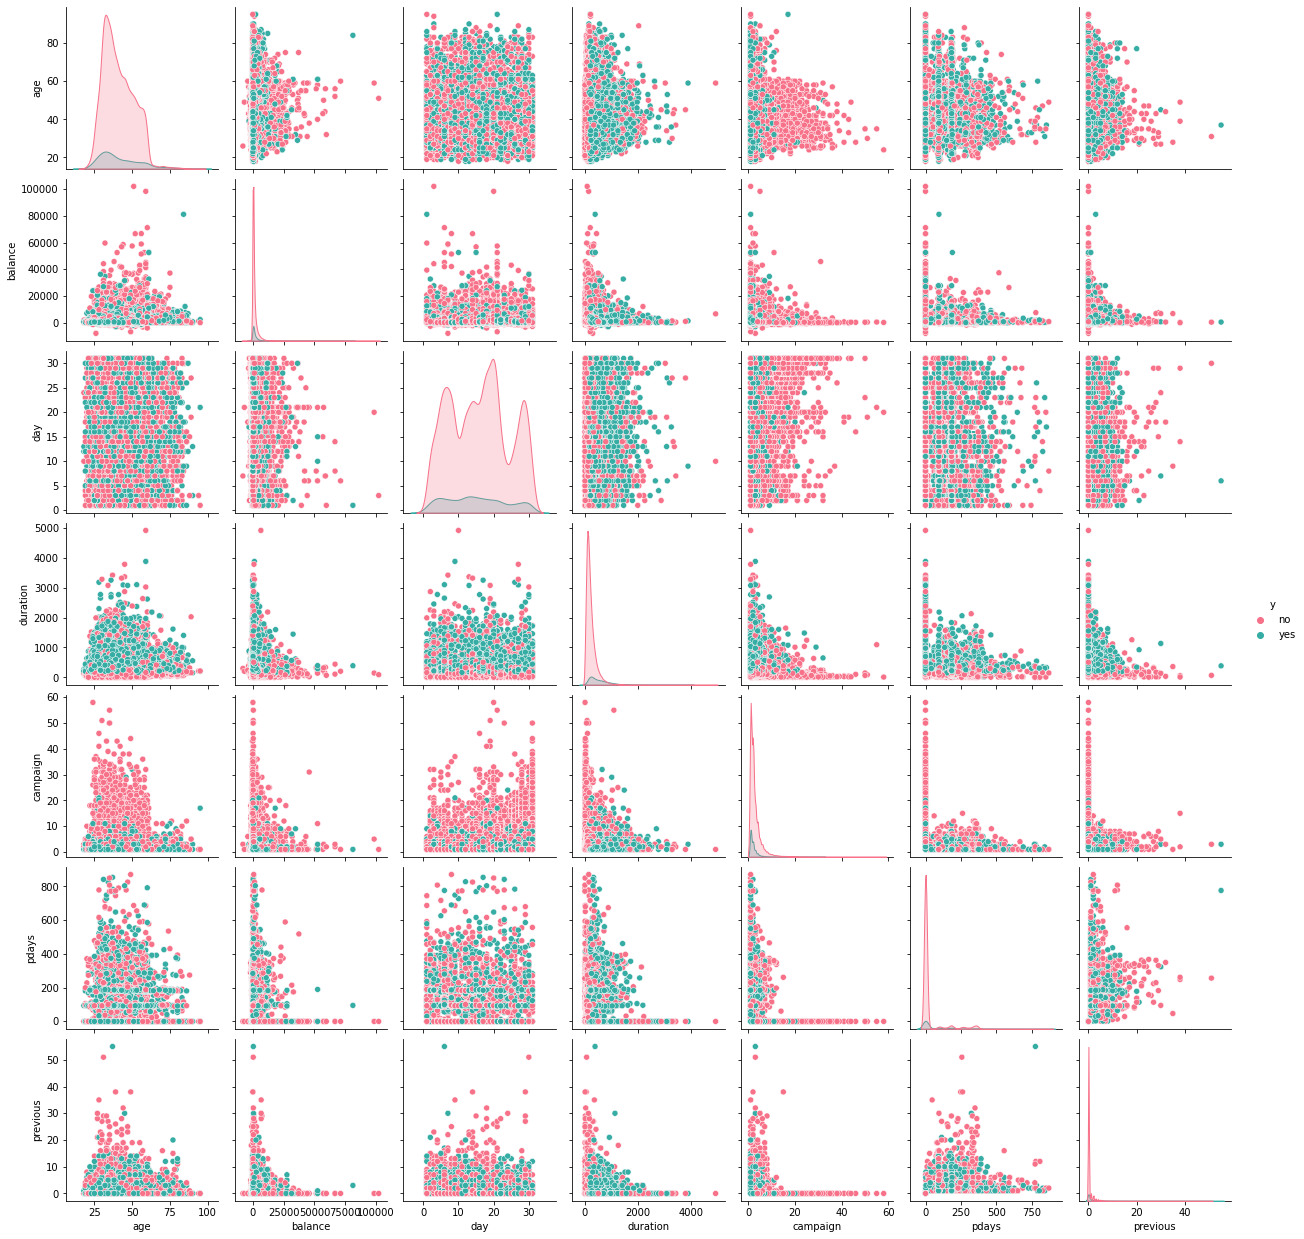

In [44]:
sns.pairplot(df, hue='y', palette="husl")

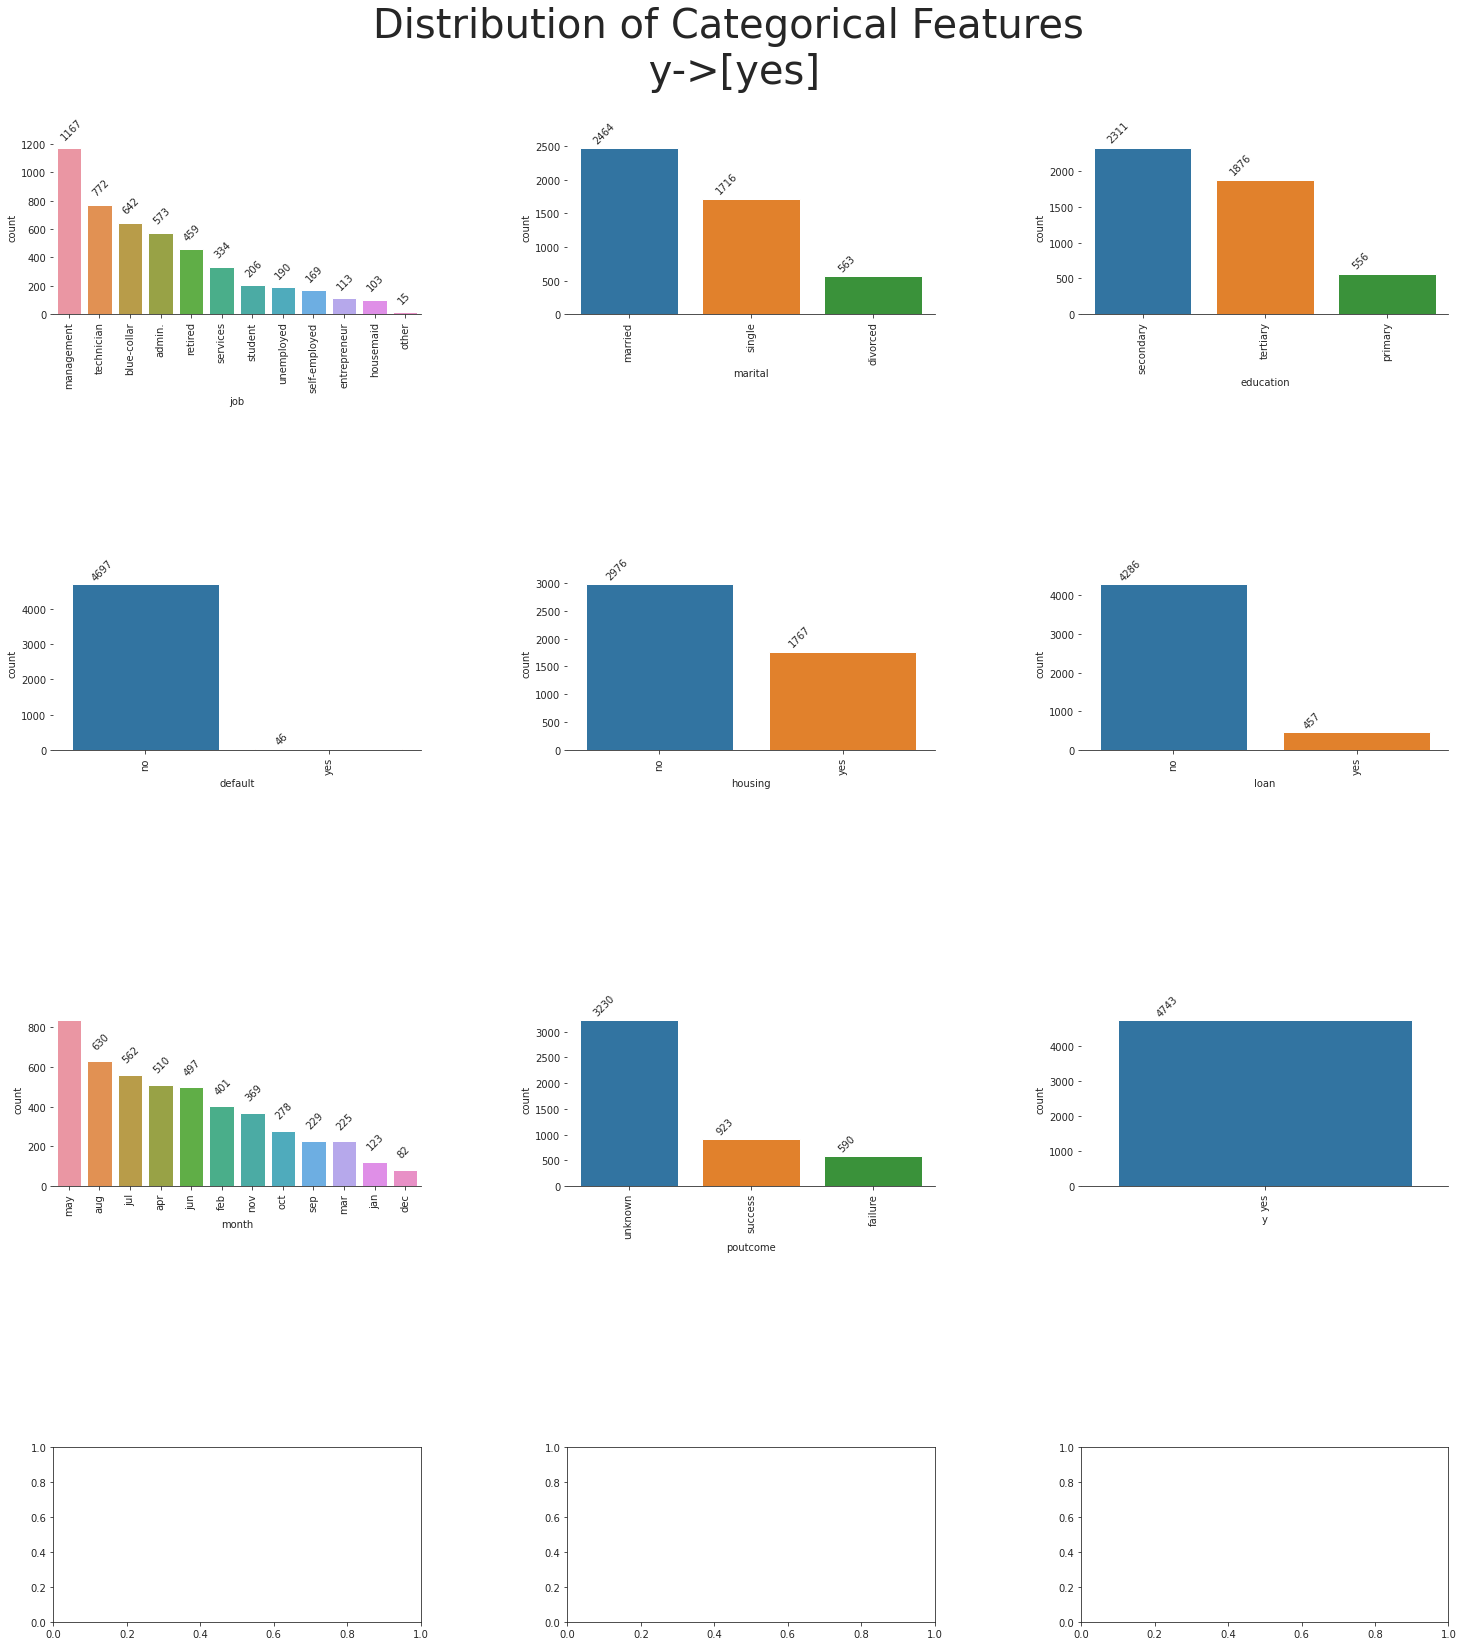

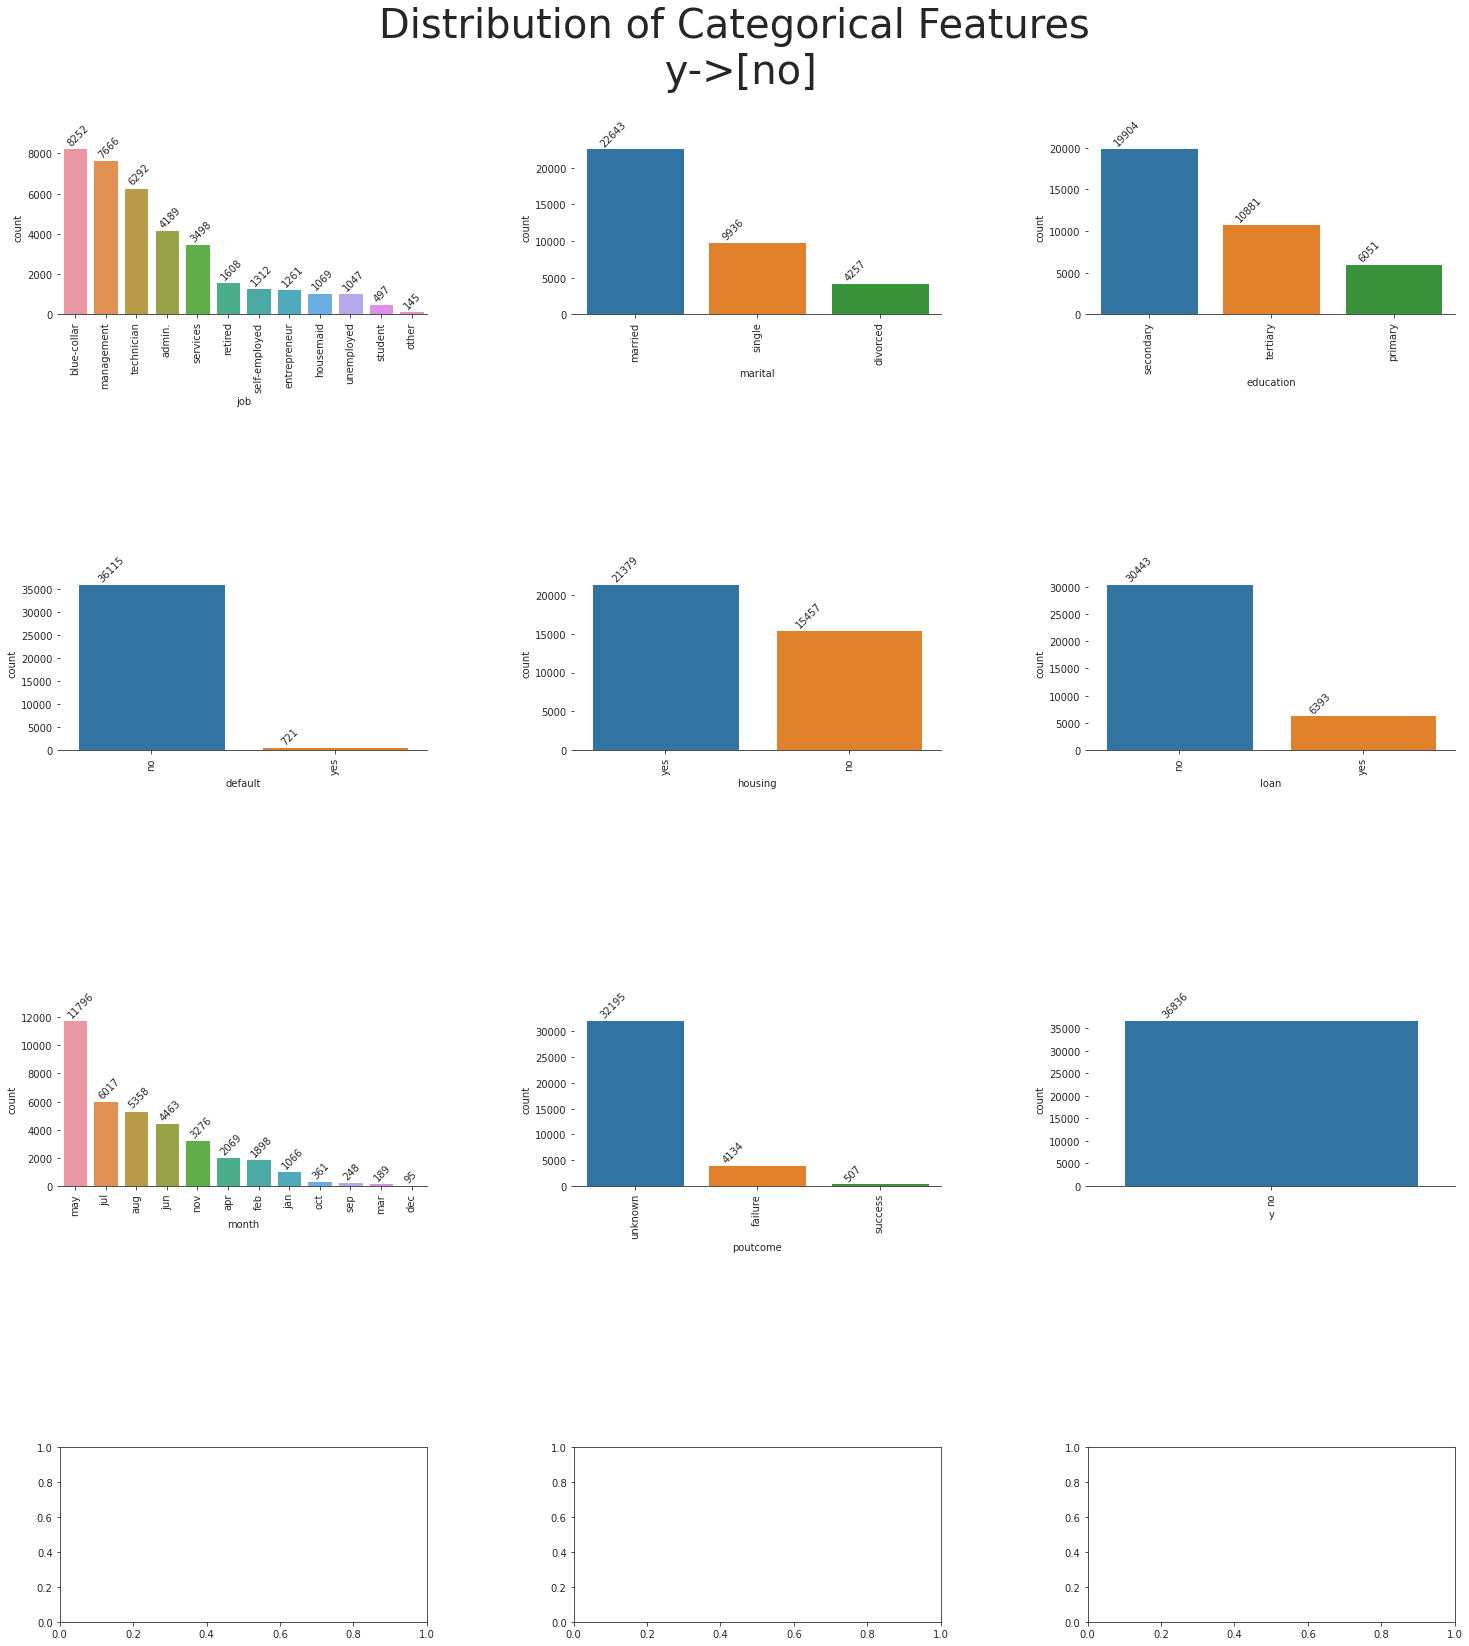

In [45]:
res=['yes','no']
for i in res:
    sns.set_style("ticks")
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 21))
    fig.suptitle("Distribution of Categorical Features\n y->[{}]".format(i),
             horizontalalignment='center', y=1.05,
             verticalalignment='center', fontsize=40)
    fig.subplots_adjust(top=0.99, bottom=0.01, hspace=1.5, wspace=0.4)
    for ax, c in list(zip(axes.flat, cat_var)):        
        sns.countplot(c, data=df[df['y']=='{}'.format(i)],order= df[df['y']=='{}'.format(i)][c].value_counts().index,
                  ax=ax)
        for p in ax.patches:
            ax.annotate("{}".format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),
                       ha='left', va='bottom', rotation=45)
        ax.tick_params(labelrotation=90)  
        plt.sca(ax)
        plt.yticks(rotation=0)    
         # ax.axis('off')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(True)
        ax.spines['left'].set_visible(False)

In [97]:
df_grouped = df.groupby("y")
class_name_no = "no"
class_name_yes = "yes"
df_grouped_no = df_grouped.get_group(class_name_no)
df_grouped_yes =df_grouped.get_group(class_name_yes)

Text(0, 0.5, 'Count')

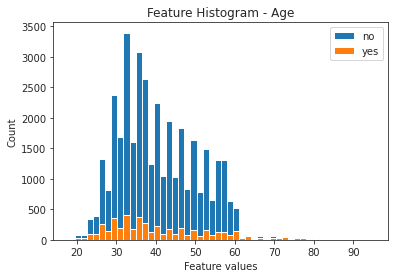

In [98]:
plt.figure()
plt.hist(df_grouped_no['age'], bins=50, label=class_name_no)
plt.hist(df_grouped_yes['age'], bins=50, label=class_name_yes)
plt.legend()
plt.title("Feature Histogram - Age")
plt.xlabel("Feature values")
plt.ylabel("Count")

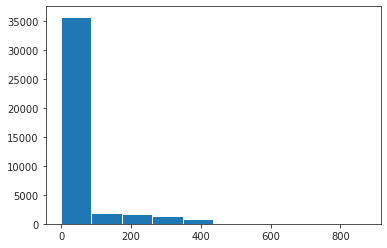

In [99]:
def drawhist(df,feature):
    plt.hist(df[feature])
drawhist(df,'pdays')

In [100]:
cat_var

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'month',
 'poutcome',
 'y']

Convert the response variable to a convenient form

In [101]:
df.y.value_counts()

no     36836
yes     4743
Name: y, dtype: int64

In [102]:
# Here we are converting this target variabe response into 0's and 1's so that it would easier for algorithm to form a model
def conver(x):
    return x.map({'no':0,'yes':1})
df[['y']]=df[['y']].apply(conver)

In [103]:
df.y.value_counts()

0    36836
1     4743
Name: y, dtype: int64

Make suitable plots for associations with numerical features and categorical features’

##Associations of categorical variables

In [104]:
# these are the categorical columns
cat_var

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'month',
 'poutcome',
 'y']

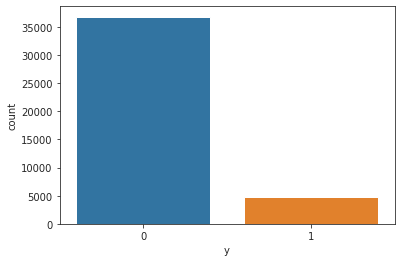

In [105]:
sns.countplot(x='y', data=df)

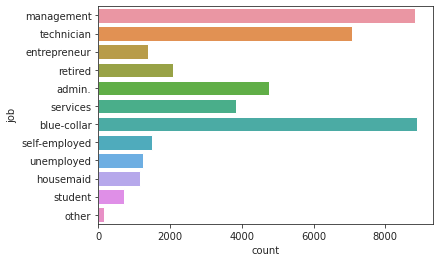

In [59]:
sns.countplot(y='job', data=df)

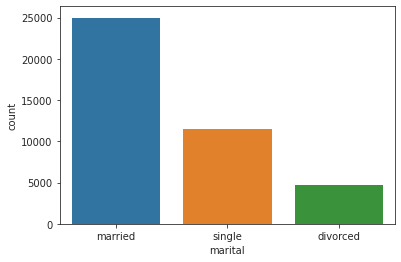

In [60]:
sns.countplot(x='marital', data=df)

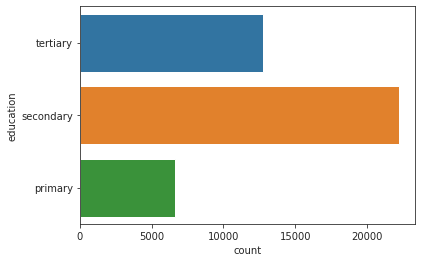

In [61]:
sns.countplot(y='education', data=df)

Associations of numerical variables

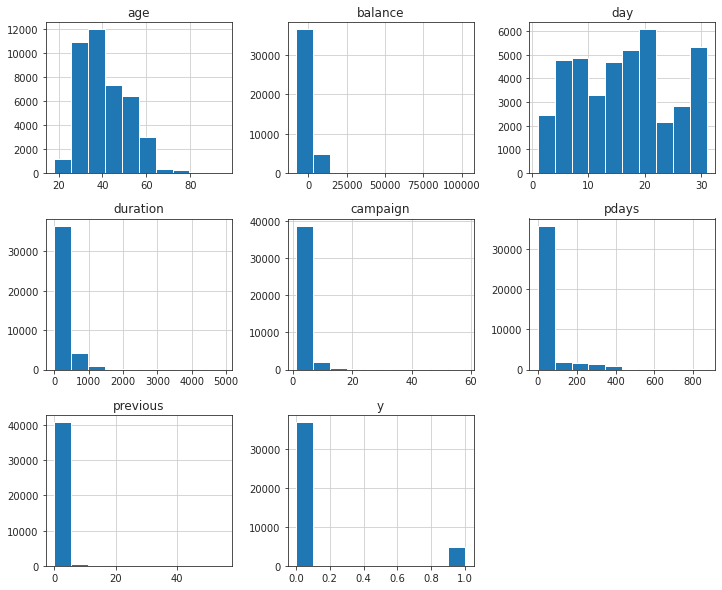

In [62]:
dist=df.hist(figsize=(12,10)) # display numerical feature distribution

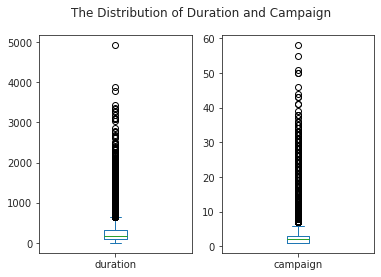

In [63]:
#distribution of duration of campaign.

dist_dur_cam = df[['duration','campaign']].plot(kind = 'box',subplots = True, layout = (1,2),sharex = False, sharey = False,title='The Distribution of Duration and Campaign')
plt.show()

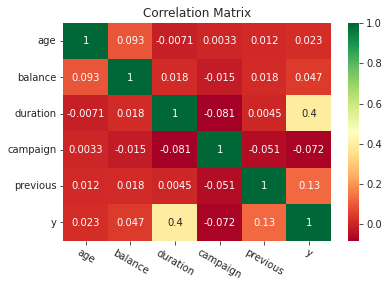

In [65]:
corr_data = df[['age','balance','duration','campaign','month','previous','y']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn')
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

This reveals a clear relationship among age, balance, duration and campaign.
To investigate more about correlation, a correlation matrix was plotted with all qualitative variables. Clearly, “campaign outcome” has a strong correlation with “duration”, a moderate correlation with “previous contacts”, and mild correlations between “balance”, “month of contact” and “number of campaign”. Their influences on campaign outcome will be investigated further in the machine learning part.

In [106]:
high_corr_variables = ['poutcome']
for var in high_corr_variables:
    df[var + '_co'] = (df[var] == 'unknown').astype(int)

In [107]:
def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    a=pd.concat(dataframes,axis=1)
    a.columns=edu
    a=a.fillna(0)
    return a

cross_tab(df,'job','education')

,tertiary,secondary,primary
job,,,
admin.,548,4013,201
blue-collar,146,5132,3616
entrepreneur,668,529,177
housemaid,169,385,618
management,7463,1082,288
other,39,70,51
retired,359,949,759
self-employed,796,558,127
services,193,3307,332


Are pdays and poutcome associated with the target?

In [108]:
pd.crosstab(df['pdays'],df['poutcome'], values=df['age'], aggfunc='count', normalize=True)

poutcome,failure,success,unknown
pdays,,,
-1,0.000000,0.000000,0.851872
1,0.000072,0.000216,0.000000
2,0.000024,0.000024,0.000000
4,0.000024,0.000024,0.000000
5,0.000024,0.000024,0.000000
...,...,...,...
828,0.000024,0.000000,0.000000
842,0.000024,0.000000,0.000000
850,0.000024,0.000000,0.000000


In [109]:
df=df.drop('poutcome', axis=1)

#Converting categorical data into dummy variables

The necessary transformations for the categorical variables and the numeric variables

In [110]:
lst=['housing','default','loan']



def conver(x):
    return x.map({'no':0,'yes':1})

for i in lst:
    df[[i]]=df[[i]].apply(conver)

lst=['job','education','marital','month']
for i in lst:
    dummy=pd.get_dummies(df[i],drop_first=True)
    df=pd.concat([df,dummy],axis=1)
    df.drop([i],axis=1,inplace=True)

In [111]:
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
5,35,0,231,1,0,5,139,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
6,28,0,447,1,1,5,217,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [112]:
df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'poutcome_co', 'blue-collar',
       'entrepreneur', 'housemaid', 'management', 'other', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'secondary', 'tertiary', 'married', 'single', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep'],
      dtype='object')

In [113]:
df.y

0        0
1        0
2        0
5        0
6        0
        ..
45205    1
45206    1
45207    1
45208    1
45209    0
Name: y, Length: 41579, dtype: int64

Train test split

In [114]:
X=df.drop('y', axis=1)
Y=df['y']

#Prepare test data

In [244]:
test_set = pd.read_csv('./test.csv', sep=';')
test_set.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [245]:
test_set.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [246]:
test_set.shape

(4521, 17)

In [247]:
#Drop column "contact" which is useless
test_set =test_set.drop('contact', axis=1)

In [248]:
test_set_up = test_set[test_set.pdays != -1]

In [249]:
test_set_up.pdays.describe()

count    816.000000
mean     224.865196
std      117.200417
min        1.000000
25%      136.000000
50%      189.000000
75%      330.000000
max      871.000000
Name: pdays, dtype: float64

In [250]:
# Delete the rows which column 'poutcome' contains 'other'
condition = df.poutcome == 'other'
test_set =test_set.drop(test_set[condition].index, axis = 0, inplace = False)

test_set[['job','education']] = test_set[['job','education']].replace(['unknown'],'other')

In [251]:
#  Drop customer values with 'other' education
condition3 = (test_set['education'] == 'other')
test_set = test_set.drop(test_set[condition3].index, axis = 0, inplace = False)

In [252]:
bartest_set=test_set.groupby(['education'])['balance'].median()
bartest_set

education
primary      396.5
secondary    381.5
tertiary     574.0
Name: balance, dtype: float64

In [254]:
print(bartest_set.idxmax(),' has highest median value with {}'.format(bartest_set.max()))

tertiary  has highest median value with 574.0


Text(0.5, 1.0, 'Grouping Education based on balance')

<Figure size 720x288 with 0 Axes>

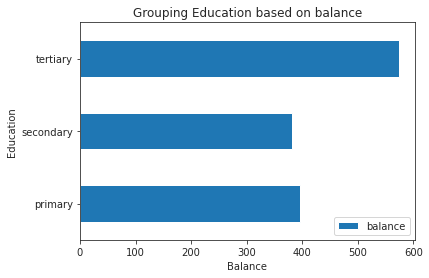

In [255]:
from matplotlib import *
import seaborn as sns
plt.figure(figsize=(10,4))
bardf=pd.DataFrame(bartest_set)
#mycolors=('y','y','b')
bardf.plot.barh()
plt.ylabel('Education')
plt.xlabel('Balance')
plt.title('Grouping Education based on balance')

In [256]:
import warnings
warnings.filterwarnings('ignore')

In [257]:
num_var=list(test_set.select_dtypes(exclude='object').columns)
df[num_var]

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


In [258]:
cat_var=list(test_set.select_dtypes(exclude=[np.number]).columns)
test_set[cat_var]

,job,marital,education,default,housing,loan,month,poutcome,y
0,unemployed,married,primary,no,no,no,oct,unknown,no
1,services,married,secondary,no,yes,yes,may,failure,no
2,management,single,tertiary,no,yes,no,apr,failure,no
3,management,married,tertiary,no,yes,yes,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,may,unknown,no
...,...,...,...,...,...,...,...,...,...
4514,blue-collar,married,secondary,no,yes,no,apr,failure,no
4515,services,single,secondary,no,yes,no,jul,unknown,no
4516,services,married,secondary,no,yes,no,jul,unknown,no
4517,self-employed,married,tertiary,yes,yes,yes,may,unknown,no


In [259]:
cat_var

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'month',
 'poutcome',
 'y']

In [260]:
test_set.y.value_counts()

no     3681
yes     464
Name: y, dtype: int64

In [261]:
# Here we are converting this target variabe response into 0's and 1's so that it would easier for algorithm to form a model
def conver(x):
    return x.map({'no':0,'yes':1})
test_set[['y']]=test_set[['y']].apply(conver)

In [262]:
test_set.y.value_counts()

0    3681
1     464
Name: y, dtype: int64

In [264]:
high_corr_variables = ['poutcome']
for var in high_corr_variables:
    test_set[var + '_co'] = (test_set[var] == 'unknown').astype(int)

In [265]:
def cross_tab(test_set,f1,f2):
    jobs=list(test_set[f1].unique())
    edu=list(test_set[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=test_set[test_set[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    a=pd.concat(dataframes,axis=1)
    a.columns=edu
    a=a.fillna(0)
    return a

cross_tab(df,'job','education')

,primary,secondary,tertiary,unknown
job,,,,
admin.,17,393,51,17
blue-collar,369,524,12,41
entrepreneur,26,58,73,11
housemaid,57,28,22,5
management,39,116,787,27
retired,80,105,31,14
self-employed,15,76,88,4
services,25,363,16,13
student,2,47,19,16


In [266]:
pd.crosstab(test_set['pdays'],test_set['poutcome'], values=test_set['age'], aggfunc='count', normalize=True)

poutcome,failure,success,unknown
pdays,,,
-1,0.000000,0.000000,0.85766
1,0.000000,0.000483,0.00000
7,0.000241,0.000241,0.00000
28,0.000241,0.000000,0.00000
58,0.000241,0.000000,0.00000
...,...,...,...
674,0.000241,0.000000,0.00000
687,0.000241,0.000000,0.00000
804,0.000241,0.000000,0.00000


In [267]:
test_set=test_set.drop('poutcome', axis=1)

In [268]:
lst=['housing','default','loan']



def conver(x):
    return x.map({'no':0,'yes':1})

for i in lst:
    test_set[[i]]=test_set[[i]].apply(conver)

lst=['job','education','marital','month']
for i in lst:
    dummy=pd.get_dummies(test_set[i],drop_first=True)
    test_set=pd.concat([test_set,dummy],axis=1)
    test_set.drop([i],axis=1,inplace=True)

In [269]:
test_set.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,30,0,1787,0,0,19,79,1,-1,0,...,0,0,0,0,0,0,0,0,1,0
1,33,0,4789,1,1,11,220,1,339,4,...,0,0,0,0,0,0,1,0,0,0
2,35,0,1350,1,0,16,185,1,330,1,...,0,0,0,0,0,0,0,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,...,0,0,0,0,1,0,0,0,0,0
4,59,0,0,1,0,5,226,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [270]:
test_set.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'poutcome_co', 'blue-collar',
       'entrepreneur', 'housemaid', 'management', 'other', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'secondary', 'tertiary', 'married', 'single', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep'],
      dtype='object')

In [271]:
X_test=test_set.drop('y', axis=1)
Y_test=test_set['y']

#Predictive model 1: Logistic regression

handelling imbalanced data whit smoth

In [148]:
from imblearn.over_sampling import SMOTE

In [150]:
X_train,y_train = SMOTE().fit_resample(X,Y)

In [151]:
y_train.value_counts()

0    36836
1    36836
Name: y, dtype: int64

In [272]:
X_test,y_test = SMOTE().fit_resample(X_test,Y_test)

In [273]:
y_test.value_counts()

0    3681
1    3681
Name: y, dtype: int64

In [195]:
from sklearn.preprocessing import StandardScaler

In [196]:
sc = StandardScaler()

In [274]:
X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

#Logistic regression

In [321]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import *
from sklearn.feature_selection import RFE
import statsmodels.api as sm

In [322]:
log= LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [308]:
y_pred1=log.predict(X_test)
conf_mat=confusion_matrix(y_test,y_pred1)
index=['actual No','actual yes']
columns=['predicted no','predicted yes']
demo=pd.DataFrame(conf_mat,index=index,columns=columns)
demo

,predicted no,predicted yes
actual No,3471,210
actual yes,332,3349


In [320]:
precision_score(y_test, y_pred1)

0.9409946614217477

In [319]:
recall_score(y_test, y_pred1)

0.9098071176310785

In [311]:
# Classification Report
from sklearn.metrics import classification_report
print('This is for all features')
print(classification_report(y_test, y_pred1))

This is for all features
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3681
           1       0.94      0.91      0.93      3681

    accuracy                           0.93      7362
   macro avg       0.93      0.93      0.93      7362
weighted avg       0.93      0.93      0.93      7362



#Predictive model 2: Random Forest

In [312]:
from sklearn.ensemble import RandomForestClassifier

In [314]:
model = RandomForestClassifier(n_estimators=18)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=18)

In [315]:
y_pred2=model.predict(X_test)
conf_mat=confusion_matrix(y_test,y_pred2)
index=['actual No','actual yes']
columns=['predicted no','predicted yes']
demo=pd.DataFrame(conf_mat,index=index,columns=columns)
demo

,predicted no,predicted yes
actual No,3657,24
actual yes,183,3498


In [317]:
precision_score(y_test, y_pred2)

0.9931856899488927

In [318]:
recall_score(y_test, y_pred2)

0.9502852485737572

In [316]:
# Classification Report
from sklearn.metrics import classification_report
print('This is for all features')
print(classification_report(y_test, y_pred2))

This is for all features
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3681
           1       0.99      0.95      0.97      3681

    accuracy                           0.97      7362
   macro avg       0.97      0.97      0.97      7362
weighted avg       0.97      0.97      0.97      7362



#Predictive model 3: Naive Bayes

In [324]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [325]:
y_pred3=nb.predict(X_test)
conf_mat=confusion_matrix(y_test,y_pred3)
index=['actual No','actual yes']
columns=['predicted no','predicted yes']
demo=pd.DataFrame(conf_mat,index=index,columns=columns)
demo

,predicted no,predicted yes
actual No,3059,622
actual yes,401,3280


In [326]:
precision_score(y_test, y_pred3)

0.840594566888775

In [327]:
recall_score(y_test, y_pred3)

0.8910622113556099

In [328]:
# Classification Report
from sklearn.metrics import classification_report
print('This is for all features')
print(classification_report(y_test, y_pred3))

This is for all features
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      3681
           1       0.84      0.89      0.87      3681

    accuracy                           0.86      7362
   macro avg       0.86      0.86      0.86      7362
weighted avg       0.86      0.86      0.86      7362



#Predictive model 4: Decision Tree

In [334]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [335]:
y_pred4=tree.predict(X_test)
conf_mat=confusion_matrix(y_test,y_pred4)
index=['actual No','actual yes']
columns=['predicted no','predicted yes']
demo=pd.DataFrame(conf_mat,index=index,columns=columns)
demo

,predicted no,predicted yes
actual No,3031,650
actual yes,252,3429


In [336]:
precision_score(y_test, y_pred4)

0.8406472174552586

In [337]:
recall_score(y_test, y_pred4)

0.9315403422982885

In [338]:
# Classification Report
from sklearn.metrics import classification_report
print('This is for all features')
print(classification_report(y_test, y_pred4))

This is for all features
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      3681
           1       0.84      0.93      0.88      3681

    accuracy                           0.88      7362
   macro avg       0.88      0.88      0.88      7362
weighted avg       0.88      0.88      0.88      7362



Compare the performance of the Random Forest, the logistic model, the Naive Bayes and Decision Tree

1- Accuracy score for selected features when we use logistic model is #### 0.93, when we use Random forest model is #### 0.97, when we use Naive Bayes model is ####0.86 and  when we use Decision Tree model is #### 0.88

2- Precision score for selected features when we use logistic model is #### 0.9409, when we use Random forest model is #### 0.9931, when we use Naive Bayes model is ####0.8405 and  when we use Decision Tree model is #### 0.8406

3- recall for selected features when we use logistic model is #### 0.9098 and when we use Random forest model is #### 0.9502, when we use Naive Bayes model is ####0.89 and  when we use Decision Tree model is #### 0.9315

###Which metric did you choose and why?

The next step after implementing a machine learning algorithm is to find out how effective is the model based on metric and datasets. Different performance metrics are used to evaluate different Machine Learning Algorithms. For example a classifier used to distinguish between images of different objects; we can use classification performance metrics such as, Precision score,accuracy score , recall score and Cross val score etc.

The machine learning model cannot be simply tested using the training set, because the output will be prejudiced, because the process of training the machine learning model has already tuned the predicted outcome to the training dataset. Therefore in order to estimate the generalization error, the model is required to test a dataset which it hasn’t seen yet; giving birth to the term testing dataset.

###Which model has better performance on the test set?
To benchmark and comparing classification scores between Random Forest, the logistic model, the Naive Bayes and Decision Tree, metrics such as accuracy, area under the curve, true positive rate, false positive rate, and precision were analyzed. To provide statistical quantification as to whether a difference in model performance is conclusive enough to state the difference is significant or if the observed difference is by random chance

Random forest has got better accuracy score compared to logistic,  Naive Bayes and Decision Tree hence we can say that it has better performance
